In [ ]:
#https://facebook.github.io/prophet/

In [ ]:
#!pip install prophet
#!pip install plotly

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv('./test_prophet.csv')
df.head()

,DT,Customer_id,AUM
0,2016-08-31,3642150,26863.85
1,2016-09-30,3642150,26619.96
2,2016-10-31,3642150,25839.00
3,2016-11-30,3642150,24592.85
4,2016-12-31,3642150,24322.76


In [3]:
df = df[['DT','AUM']]

In [4]:
df.columns = ['ds','y']

In [5]:
m = Prophet(seasonality_mode='multiplicative') #for monthly data
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=31)
future.tail()

,ds
88,2021-10-27
89,2021-10-28
90,2021-10-29
91,2021-10-30
92,2021-10-31


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(13)


,ds,yhat,yhat_lower,yhat_upper
80,2021-10-19,9713.355881,9452.123786,9972.587388
81,2021-10-20,9519.182656,9236.334545,9776.289838
82,2021-10-21,9378.375431,9111.566477,9653.111969
83,2021-10-22,9297.414459,9017.177097,9548.237070
84,2021-10-23,9281.172055,9030.456906,9528.368406
85,2021-10-24,9332.766940,9068.726433,9608.880873
86,2021-10-25,9453.467251,9180.228306,9711.111471
87,2021-10-26,9642.645066,9401.304868,9892.933330
88,2021-10-27,9897.783765,9624.308181,10150.618378
89,2021-10-28,10214.538115,9959.160923,10480.028289


In [8]:
forecast[forecast['ds']=='2021-10-31']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
92,2021-10-31,11646.200971,11188.07316,11714.955603,11640.913304,11651.337725,-0.015449,-0.015449,-0.015449,-0.015449,-0.015449,-0.015449,0.0,0.0,0.0,11466.27952


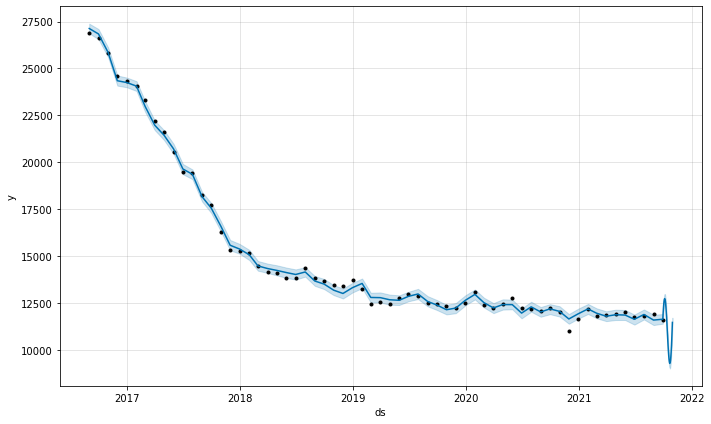

In [9]:
fcst = m.predict(future)
fig = m.plot(fcst)